# Cleaning

In [1]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
import matplotlib.pyplot as plt

In [3]:
# Load the dataframe from a csv file
df_cf = pd.read_csv('Generated_CFs/cf_df_12000_2_1.csv')

In [4]:
# Load the dataframe from a csv file
df = pd.read_csv('CensusAdultIncome.csv')

In [5]:
start_index = 1 + len(df)  # Calculate the starting index
new_index = range(start_index, start_index + len(df_cf))  # Create a new index starting from start_index
df_cf_reset = df_cf.copy()  # Create a copy of the DataFrame
df_cf_reset.index = new_index  # Set the new index
df_cf = df_cf_reset # Assign the new indexed DataFrame to the original DataFrame
df_cf.drop(columns=['Unnamed: 0'], inplace=True)  # Drop the 'Unnamed: 0' column

In [6]:
#Target value has values with dots, therefore 4 catagories
df['income'] = df['income'].str.replace('.', '')

# Replace the values in the target column with string '0' and '1'.
df['income'] = df['income'].str.replace('<=50K', '0')  
df['income'] = df['income'].str.replace('>50K', '1')   

# Convert to integer
df['income'] = df['income'].astype(int)

In [7]:
#Some values are like '?'. Replacing them as NaN 
df[df == '?'] = np.nan
# Dropping the rows with NaN values in  'workclass', 'occupation', 'native-country' for the test dataset
df.dropna(subset=['workclass', 'occupation', 'native-country'], inplace=True)
df.dropna( inplace=True)
df.drop(columns=['education'], inplace=True)

In [ ]:
df = df[0:1000]

# Graphs for features

In [9]:
def stacked_histogram(df_1, df_2, column_name):
    # Generate random colors
    num_colors = 2  # Number of colors needed (one for each DataFrame)
    colors = np.random.rand(num_colors, 3)  # Generate random RGB values
    
    # Grouping both DataFrames by 'marital-status' and counting the occurrences
    grouped_df_1 = df_1.groupby(column_name).size()
    grouped_df_2 = df_2.groupby(column_name).size()

    # Plotting the stacked histogram
    plt.figure(figsize=(10,5))
    p1 = plt.bar(grouped_df_1.index, grouped_df_1, color=colors[0], edgecolor='black')
    p2 = plt.bar(grouped_df_2.index, grouped_df_2, bottom=grouped_df_1, color= colors[1], edgecolor='black')
    plt.title('Stacked Distribution of {}'.format(column_name))
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)  # Rotate x-labels for better readability if needed
    plt.legend((p1[0], p2[0]), ('Original', 'Counterfactual'))
    plt.show()

In [10]:
def stacked_numerical_histogram(df1, df2, column_name):
    # Generate random colors
    num_colors = 2  # Number of colors needed (one for each DataFrame)
    colors = np.random.rand(num_colors, 3)  # Generate random RGB values
    
    plt.figure(figsize=(10,6))
    plt.hist([df1[column_name], df2[column_name]], bins=20,  color=colors, edgecolor='black', stacked=True)
    plt.title('Stacked Distribution of {}'.format(column_name))
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.legend(['Original', 'Counterfactual'])
    plt.show()

In [11]:
def stacked_cat_histogram(df_1, column_name):
    # Generate random colors
    num_colors = 2  # Number of colors needed (one for each DataFrame)
    colors = np.random.rand(num_colors, 3)  # Generate random RGB values
    
    # Grouping both DataFrames by 'marital-status' and counting the occurrences
    grouped_df_1 = df_1.groupby(column_name).size()
    #grouped_df_2 = df_2.groupby(column_name).size()

    # Plotting the stacked histogram
    plt.figure(figsize=(10,5))
    p1 = plt.bar(grouped_df_1.index, grouped_df_1, color=colors[0], edgecolor='black')
    #p2 = plt.bar(grouped_df_2.index, grouped_df_2, bottom=grouped_df_1, color= colors[1], edgecolor='black')
    plt.title('Stacked Distribution of {}'.format(column_name))
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)  # Rotate x-labels for better readability if needed
    plt.legend([p1[0]], ['Original'])
    plt.show()

# Results

In [ ]:
df_cf.head()

,age,workclass,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
48843,44,Local-gov,24982,10,Married-civ-spouse,Husband,White,Male,0,2077,40,0
48844,44,Local-gov,24982,10,Married-spouse-absent,Not-in-family,White,Male,0,0,40,0
48845,44,Local-gov,24982,10,Widowed,Husband,White,Male,0,0,8,0
48846,44,Local-gov,24982,10,Married-civ-spouse,Husband,White,Female,0,0,64,0
48847,44,Local-gov,24982,10,Never-married,Husband,White,Male,0,1160,40,0


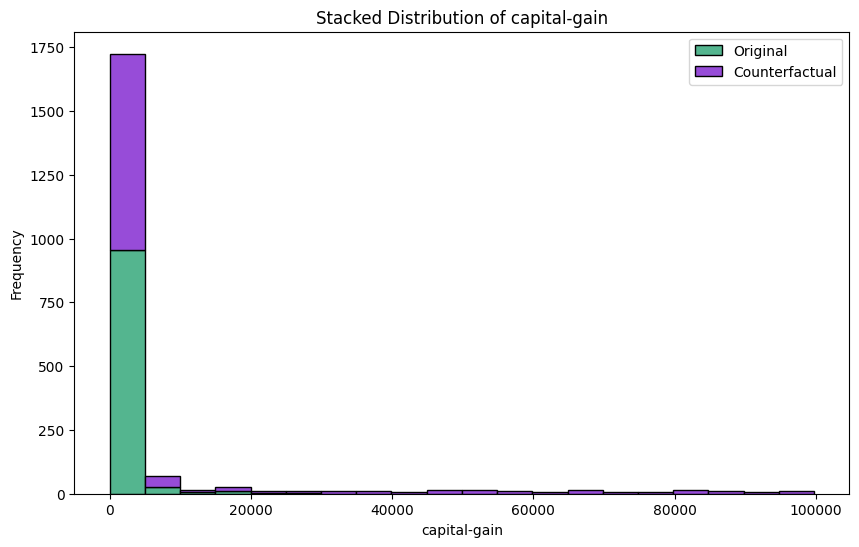

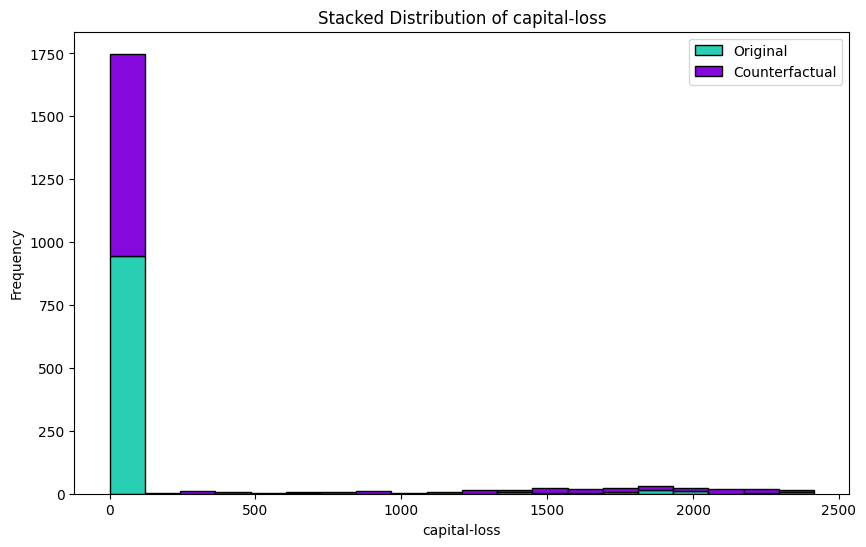

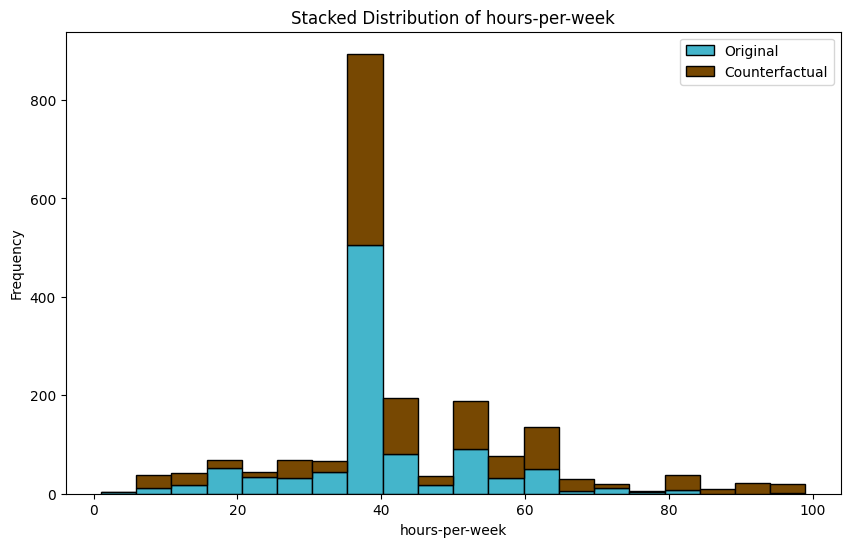

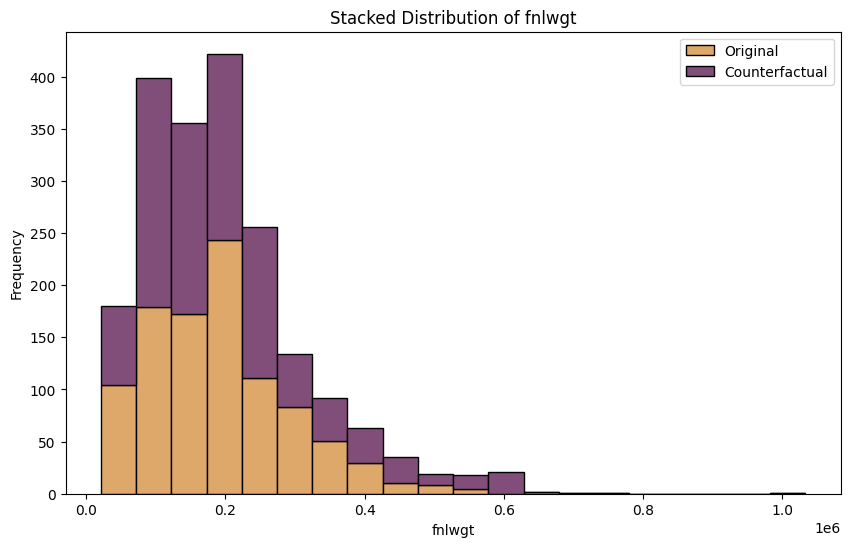

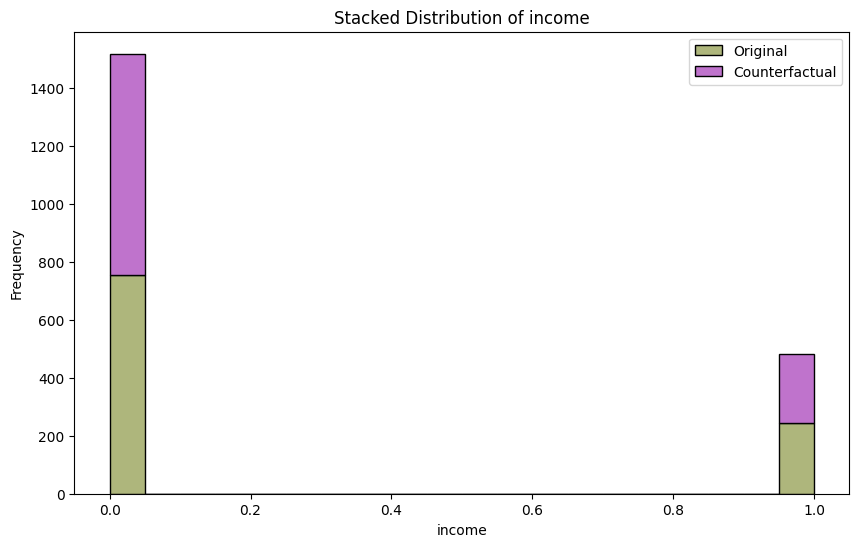

In [ ]:
stacked_numerical_histogram(df, df_cf, 'capital-gain')
stacked_numerical_histogram(df, df_cf, 'capital-loss')
stacked_numerical_histogram(df, df_cf, 'hours-per-week')
stacked_numerical_histogram(df, df_cf, 'fnlwgt')

stacked_numerical_histogram(df, df_cf, 'income')


Old dice model

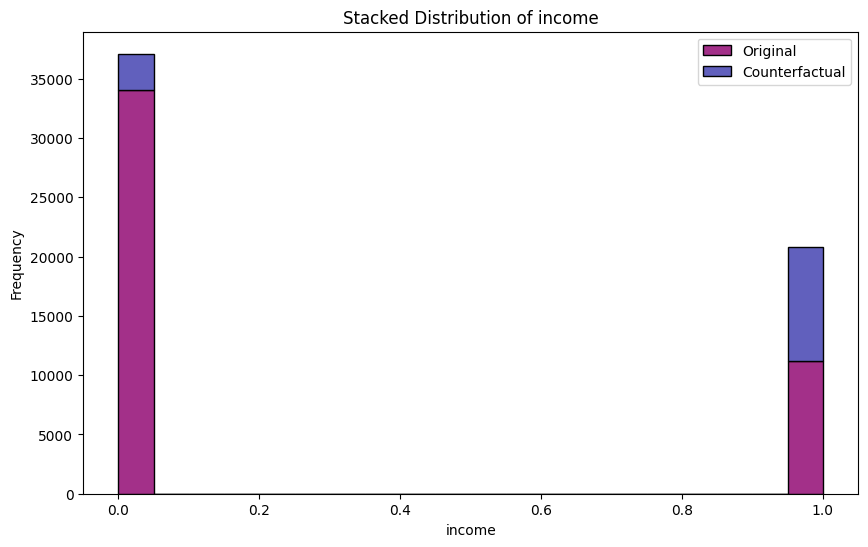

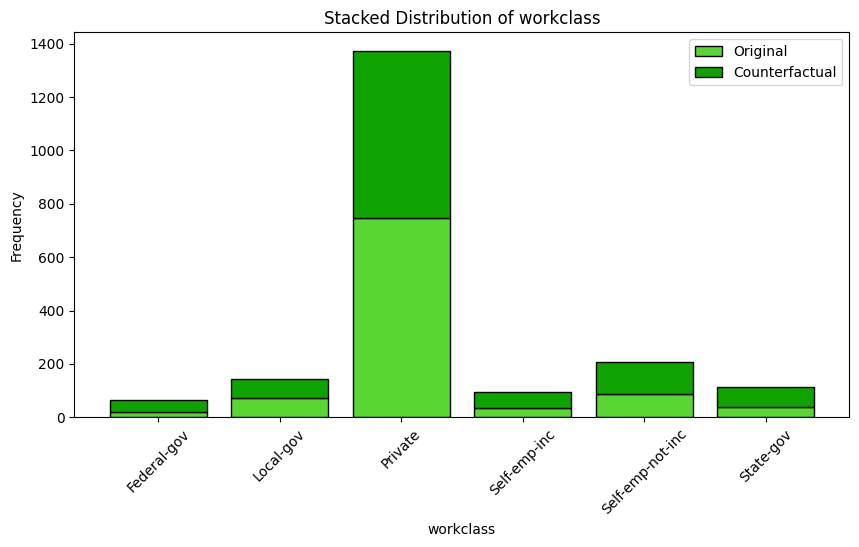

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (11,) and arg 3 with shape (16,).

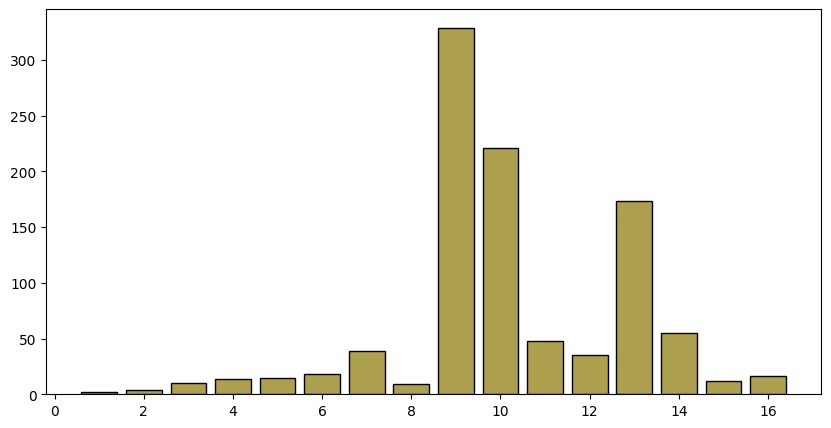

In [ ]:
stacked_histogram(df, df_cf, 'workclass')
stacked_histogram(df, df_cf, 'education-num')
stacked_histogram(df, df_cf, 'marital-status')
stacked_histogram(df, df_cf, 'relationship')
stacked_histogram(df, df_cf, 'race')
stacked_histogram(df, df_cf, 'sex')


In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


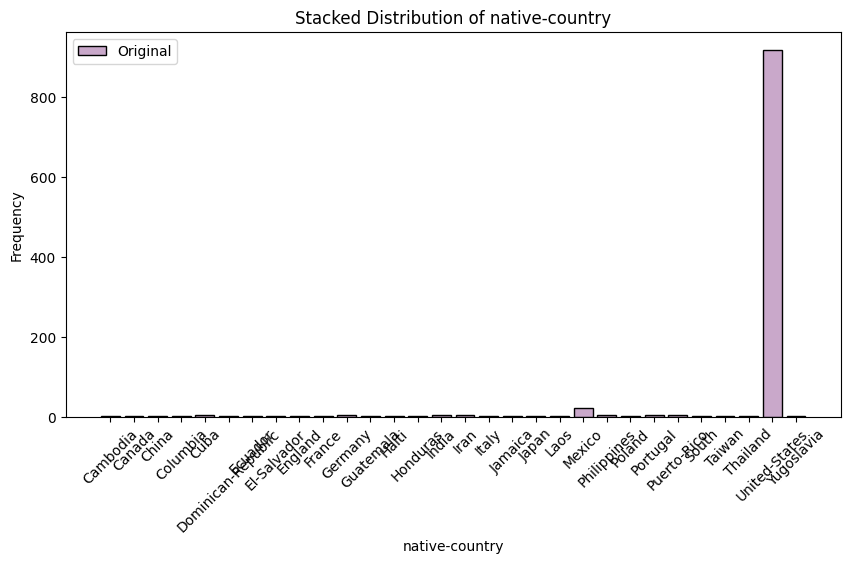

In [ ]:
stacked_cat_histogram(df, 'native-country')

# Plots for creating feature importance plot

In [ ]:
AUC_score_dif_list = [-0.072927423, -0.116239609, -0.112629443, -0.131696222, -0.124794472, -0.138250132, -0.041982585,-0.065861209

]


In [ ]:
from scipy.stats import ks_2samp
import pandas as pd

def ks_test_all_features(original_df, cf_df):
    results = {}
    # Iterate over columns in the original dataframe
    for column in original_df.columns:
        # Check if the column exists in the counterfactual dataframe and both columns are not empty
            # Apply the KS test
        stat, p_value = ks_2samp(original_df[column].dropna(), cf_df[column].dropna())
        results[column] = {'KS Statistic': stat}

    return results

# Example usage assuming original_df and cf_df have been preprocessed
ks_results = ks_test_all_features(df, df_cf)
ks_results_df = pd.DataFrame(ks_results).T
print(ks_results_df)


# Calculate the mean of the KS statistics
mean_ks_statistic = ks_results_df['KS Statistic'].mean()
print("Mean KS Statistic:", mean_ks_statistic)


                KS Statistic
age                 0.044505
workclass           0.036455
fnlwgt              0.007413
education-num       0.053734
marital-status      0.035963
relationship        0.046157
race                0.062017
sex                 0.019131
capital-gain        0.590358
capital-loss        0.169470
hours-per-week      0.042281
income              0.502948
Mean KS Statistic: 0.13420257562690727


In [ ]:
list_1 = [3166, 6331, 9495, 12000]
list_2 = [1, 2]

In [ ]:
ks_results_list = [] 
for i in list_1:
    for t in list_2:
        df_cf = pd.read_csv('Generated_CFs/cf_df_{}_{}_1.csv'.format(i,t), index_col=0)
        start_index = 1 + len(df)  # Calculate the starting index
        new_index = range(start_index, start_index + len(df_cf))  # Create a new index starting from start_index
        df_cf_reset = df_cf.copy()  # Create a copy of the DataFrame
        df_cf_reset.index = new_index  # Set the new index
        df_cf = df_cf_reset # Assign the new indexed DataFrame to the original DataFrame
        ks_results = ks_test_all_features(df, df_cf)
        ks_results_df = pd.DataFrame(ks_results).T
        mean_ks_statistic = ks_results_df['KS Statistic'].mean()
        ks_results_list.append(mean_ks_statistic)

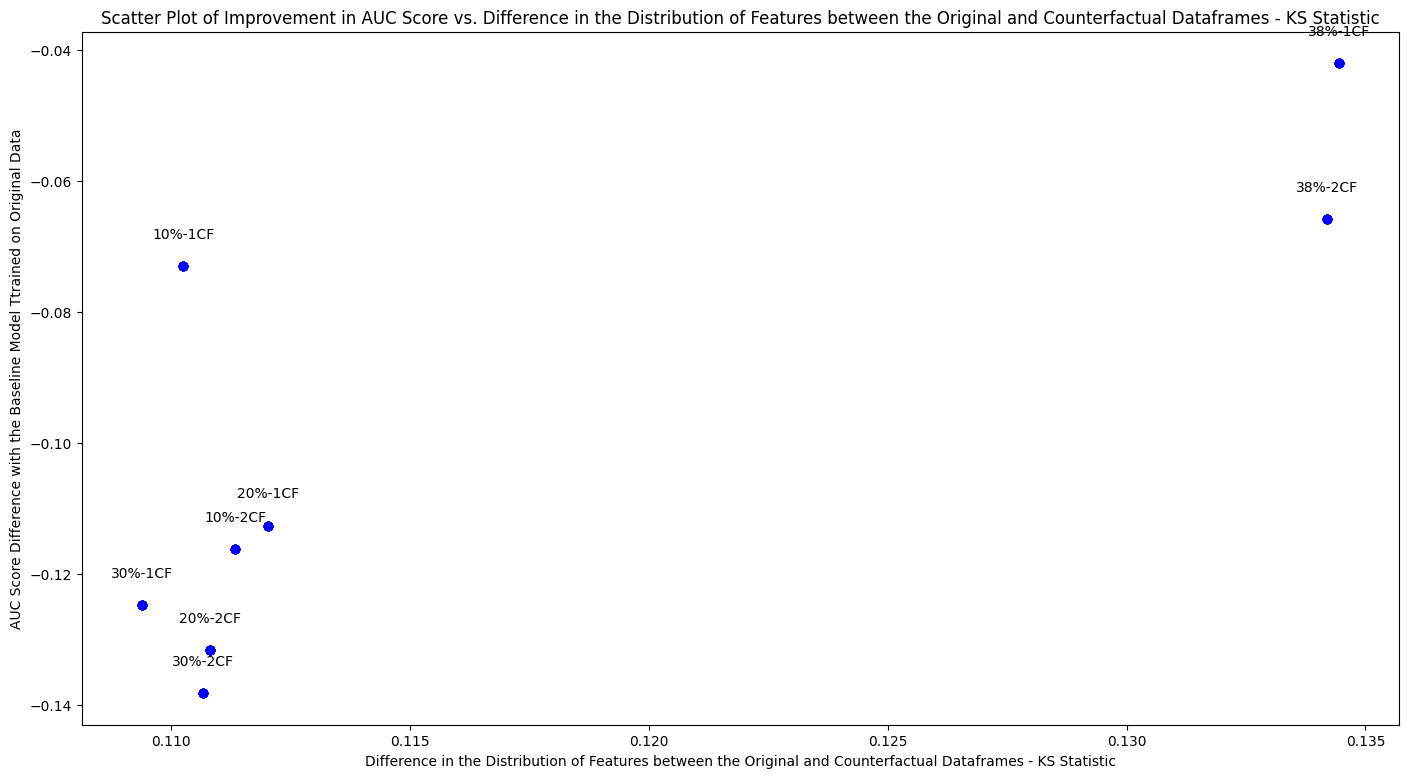

In [ ]:

labels = ['10%-1CF', '10%-2CF', '20%-1CF', '20%-2CF', '30%-1CF', '30%-2CF', '38%-1CF', '38%-2CF' ]

# Show the plot
plt.figure(figsize=(17, 9))
# Plotting
for i, label in enumerate(labels):

    plt.scatter(ks_results_list, AUC_score_dif_list, color='blue')  # You can customize the color and marker.
    plt.annotate(label, (ks_results_list[i], AUC_score_dif_list[i]),
                 textcoords="offset points", xytext=(0,20), ha='center')
plt.title('Scatter Plot of Improvement in AUC Score vs. Difference in the Distribution of Features between the Original and Counterfactual Dataframes - KS Statistic')
plt.xlabel('Difference in the Distribution of Features between the Original and Counterfactual Dataframes - KS Statistic')
plt.ylabel('AUC Score Difference with the Baseline Model Ttrained on Original Data')
plt.show()